In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [22]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]] 

 [[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]]


Solution
===

In [23]:
def euclidianLength (a, b):
    output = np.sqrt ((a[0] - b[0])*(a[0] - b[0]) + (a[1] - b[1])*(a[1] - b[1])); 
    return output

In [40]:
def naive(p, q):
    lengths = np.zeros((p.shape[0], q.shape[0]))
    for i in range (len(p)): 
        for j in range (len(q)): 
            lengths[i][j] = euclidianLength(p[i], q[j]); 
    return lengths

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [41]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [134]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]]

[[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]

In [135]:
#Ici on génère 5 repeats à chaque fois de chaque élément dans le tableau pour que l'on puisse trouver la distance
#de chaque éléments une fois on fait dans l'ordres des lingne et dans l'autre des colonnes comme ça on a 0 - 1; 0 - 2, ... 

In [136]:
def with_indices(p, q):
        rows, cols = np.indices((p.shape[0], q.shape[0])) #indices ajoute une 3e Dimension
        lengths = np.sqrt(np.sum((p[rows.ravel(), :] - q[rows.ravel(), :])**2, axis = 1)); 
        print (lengths.reshape((p.shape[0], q.shape[0])))
        return lengths

In [ ]:
#Ravel assigne déjà les deux indices donner parnp.indices aux valeurs dans le tabelau et on travaille donc avec
#des vraies valeurs alors que dans le deuxième exemples en une ligne de commande on fait tout en même temps. 

In [127]:
print (with_indices(p, q));

[[ 0.60599073  0.60599073  0.60599073  0.60599073  0.60599073]
 [ 0.21102354  0.21102354  0.21102354  0.21102354  0.21102354]
 [ 0.57200052  0.57200052  0.57200052  0.57200052  0.57200052]
 [ 0.63212897  0.63212897  0.63212897  0.63212897  0.63212897]]
[ 0.60599073  0.60599073  0.60599073  0.60599073  0.60599073  0.21102354
  0.21102354  0.21102354  0.21102354  0.21102354  0.57200052  0.57200052
  0.57200052  0.57200052  0.57200052  0.63212897  0.63212897  0.63212897
  0.63212897  0.63212897]


In [137]:
def with_indices_2(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    print (cols.shape)
    print(p[rows])
    distances = np.sqrt(np.sum((p[rows] - q[cols])**2, axis = 2)); 
    return distances

In [ ]:
#Ici on doit dealer avec des vecteurs à plusieurs dimension pusique on a creer avec le .indices mais application sans le 
#.ravel() 4 matrices et puis on veut toujours prendre colonnes par colonnes donc axis = 2. Si on avait voulu faire
#ligne par ligne alors on aurait mis axis 1. Et axis 0 représenter ici les 4 matrices. 

In [138]:
print (with_indices_2(p, q));

(4, 5)
[[[ 0.77132064  0.02075195]
  [ 0.77132064  0.02075195]
  [ 0.77132064  0.02075195]
  [ 0.77132064  0.02075195]
  [ 0.77132064  0.02075195]]

 [[ 0.63364823  0.74880388]
  [ 0.63364823  0.74880388]
  [ 0.63364823  0.74880388]
  [ 0.63364823  0.74880388]
  [ 0.63364823  0.74880388]]

 [[ 0.49850701  0.22479665]
  [ 0.49850701  0.22479665]
  [ 0.49850701  0.22479665]
  [ 0.49850701  0.22479665]
  [ 0.49850701  0.22479665]]

 [[ 0.19806286  0.76053071]
  [ 0.19806286  0.76053071]
  [ 0.19806286  0.76053071]
  [ 0.19806286  0.76053071]
  [ 0.19806286  0.76053071]]]
[[ 0.60599073  0.93659449  0.91124856  0.59321356  0.27561751]
 [ 0.80746999  0.21102354  0.67268649  0.22495084  0.46534491]
 [ 0.35654215  0.75217493  0.57200052  0.49900068  0.23310825]
 [ 0.67281411  0.52407472  0.31520226  0.63212897  0.70277376]]


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [60]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [61]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [62]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

10 loops, best of 3: 33.3 ms per loop
100 loops, best of 3: 5.67 ms per loop
1000 loops, best of 3: 765 µs per loop
100 loops, best of 3: 4.61 ms per loop


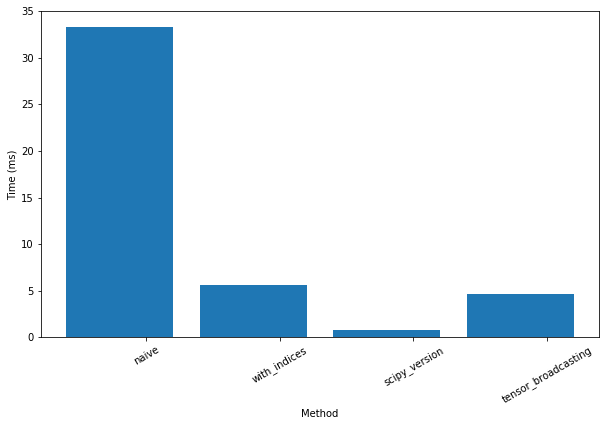

In [63]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()